In [15]:
import pandas as pd
df = pd.read_csv("../Dataset/df_merged.csv")
df_copy = df.copy()
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Encoding Categorical Variables

In [16]:
# Extracting all numerical Columns from our dataset
cat_features = df_copy.drop(['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure'],axis=1)
cat_features.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_cat = cat_features.apply(le.fit_transform)
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [18]:
# merge the dataframe we just created with the df_copy
num_features = df_copy[['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure']]
finaldf = pd.merge(num_features, df_cat, left_index=True, right_index=True)
final_df_withoutOversample = finaldf.copy()

In [19]:
finaldf.head(1)

,customerID,TotalCharges,MonthlyCharges,SeniorCitizen,tenure,gender,Partner,Dependents,PhoneService,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,29.85,29.85,0,1,0,1,0,0,1,...,0,2,0,0,0,0,0,1,2,0


## Oversampling the final_df 
- As mentioned in previous NB the dataset is imbalanced (27 % non churn) , which means that a majority of values in the target variable belong to a single class.
- This class imbalance problem can lead to an underperforming machine learning model
- Some algorithms that train on an imbalanced dataset always end up predicting the majority class
- In our case, for instance, the model may predict that none of the customers churned. While a model like this will be highly accurate (in this case it will be correct 73% of the time), it is of no value to us since it is always predicting a single outcome.
- There are a variety of techniques that can be used to overcome the class imbalance problem in machine learning. This is a process that involves randomly selecting samples from the minority class and adding it to the training dataset. We are going to oversample the minority class until the number of data points are equal to that of the majority class.
- Before we oversample, let’s do a train-test split. We will oversample solely on the training dataset, as the test dataset must be representative of the true population:

## Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

finaldf = finaldf.drop(['customerID'],axis=1) # no need for CustomerID col since its unqiue, so dropping

X = finaldf.drop(['Churn'],axis=1) # Target Variable , lets put that on y 
y = finaldf['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Let’s oversample the training dataset using SMOTE:

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote

In [22]:
# Verify smote was success, 
y_train.value_counts()
# Equal Distributed

Churn
0    3439
1    3439
Name: count, dtype: int64

## I want to Visual Compare to verify did the OverSample would cause any issue when Modeling

In [31]:
# Merge SMOTE'ed X_train and y_train into a single DataFrame
df_smote = X_train.copy()
df_smote['Churn'] = y_train

# Compare shapes
print("Original DF shape:", df_copy.shape)
print("Oversampled SMOTE'ed DF shape:", df_smote.shape)

Original DF shape: (7043, 21)
Oversampled SMOTE'ed DF shape: (6878, 20)


In [35]:
# Save the oversampled dataset to CSV for Extend Analysis
df_smote.to_csv("smote_oversampled_df.csv", index=False)

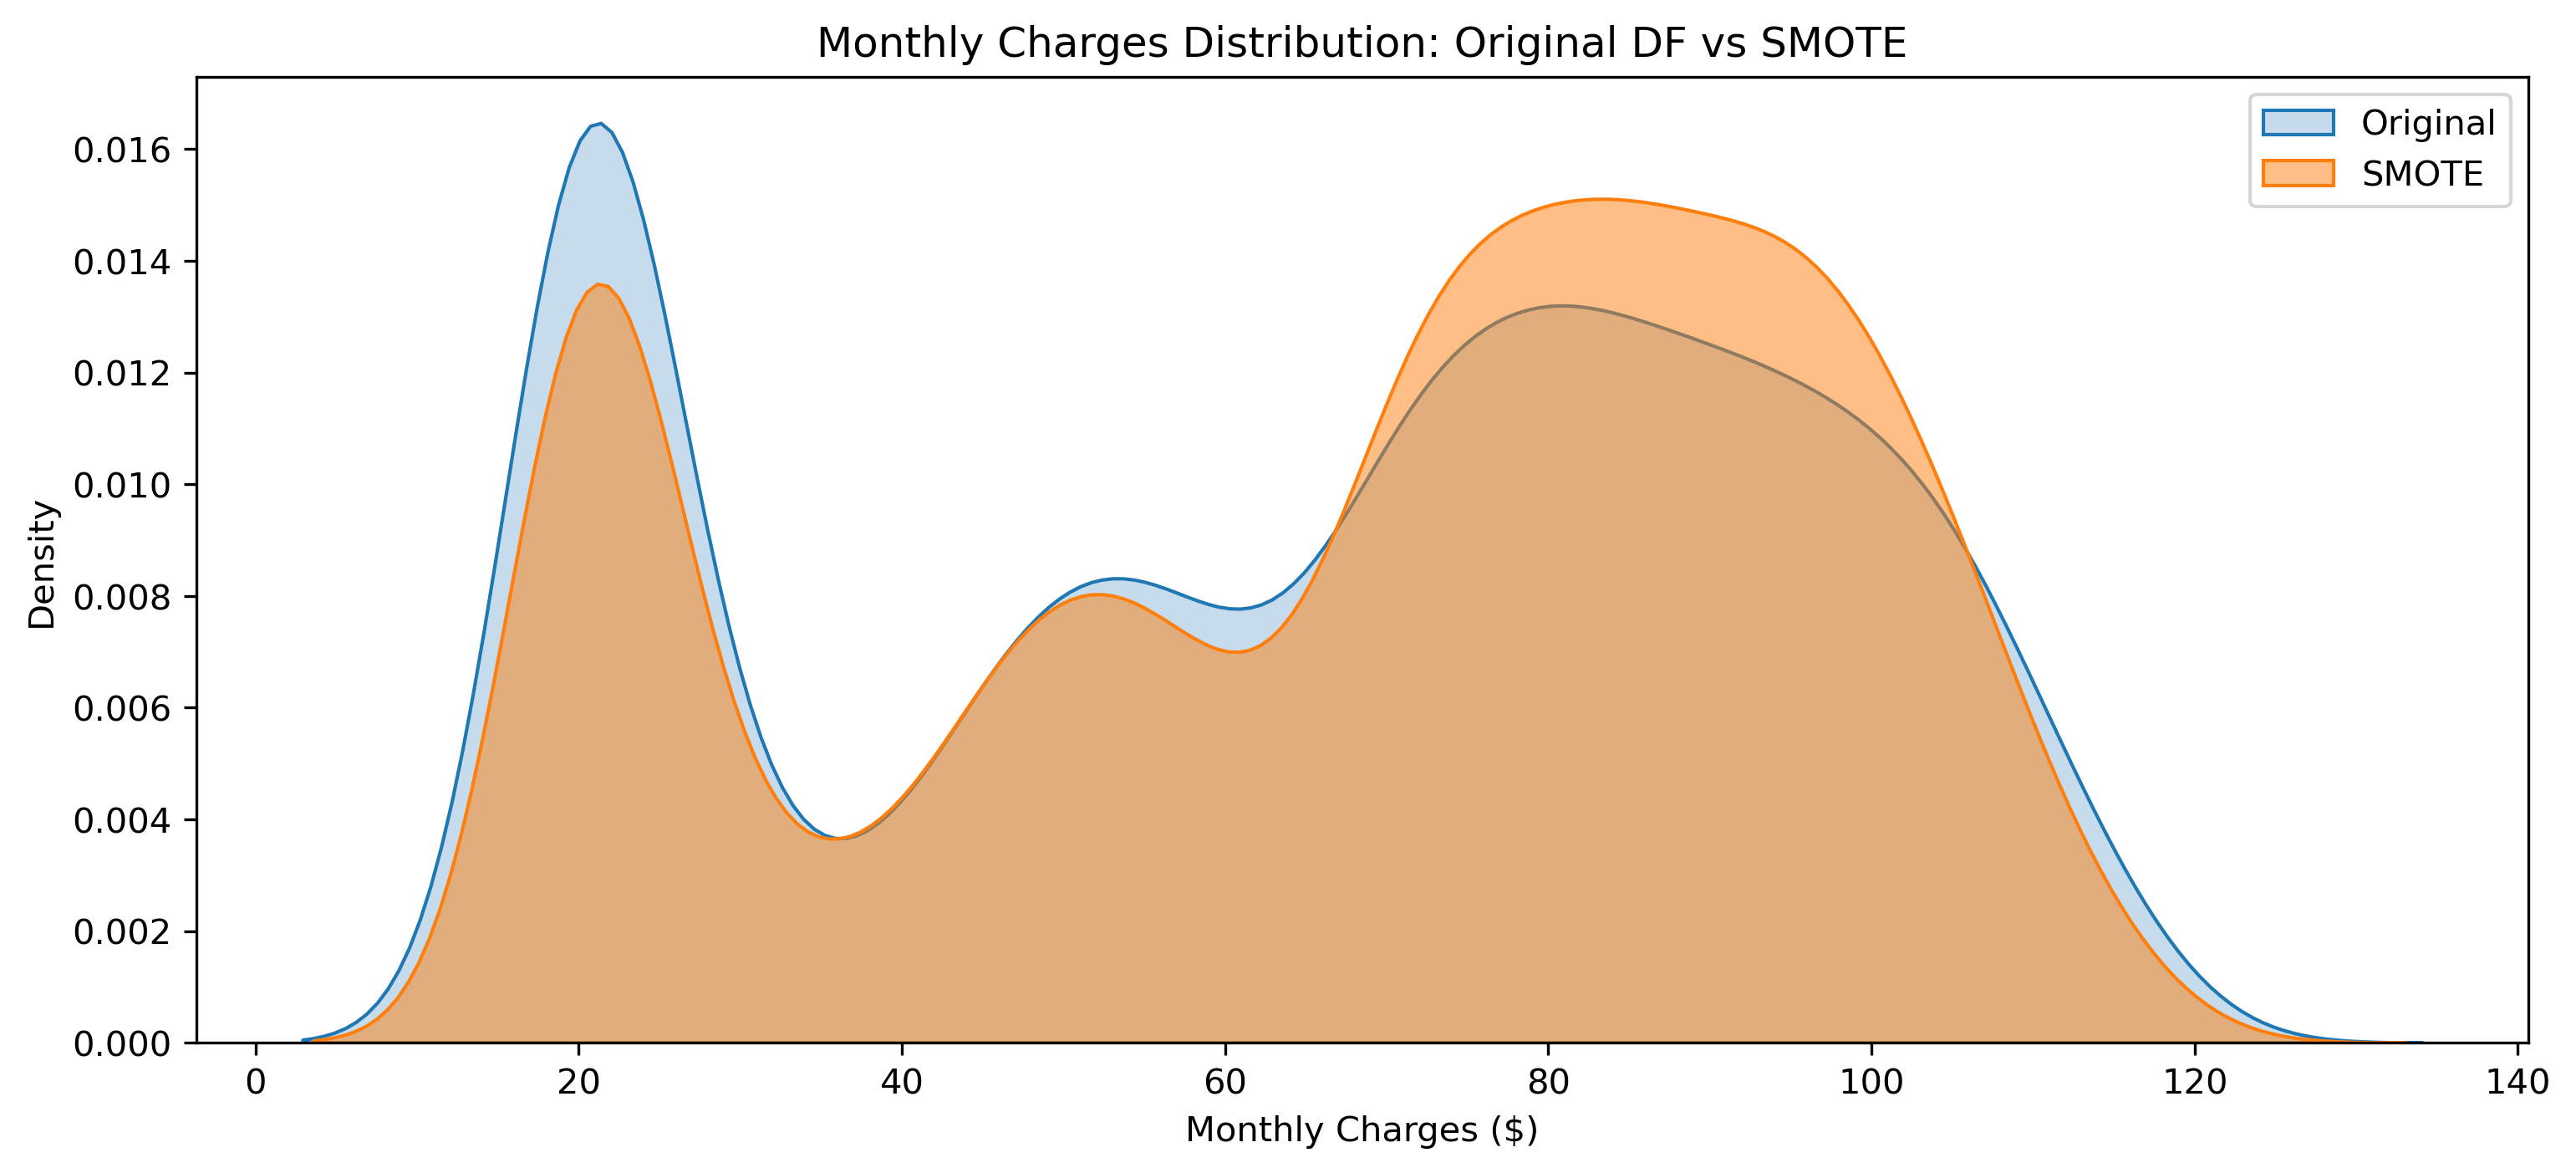

In [14]:
# Visualal Comparision done in a diff NB (SmoteDataComparision.ipynb) Org data VS Smote Data
from PIL import Image
from IPython.display import display

# Display img
img = Image.open('Plots/SmoteDF-VS-OrginalData_MontlyChargesComparision.png')
display(img)

- The SMOTE-adjusted dataset is reasonable and safe to use for modeling.

### Observations

- The shape of the distribution for MonthlyCharges in SMOTE closely follows the original data.

- Slight shifts in peaks or spread are expected because SMOTE generates synthetic data for the minority class

- No extreme or unrealistic values were introduced — min/max of SMOTE is consistent with the original dataset.

- Overall, the KDE plot confirms that SMOTE maintains the general pattern of the data, while balancing the classes for modeling purposes.


## Building the Customer Churn Prediction Model (Baseline model)

- Lets first go simple, LogisticRegression / Random Forest / Gradient Boosting / XGBoost
- Then we evaluate metrics that matter for churn Precision, Recall, F1-score, ROC-AUC, not just accuracy (because of imbalance).

In [33]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Stacking them up to use mutliple baseline models for compariison
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000, solver='lbfgs'),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

In [41]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
# Store results so i can comapre metrics of each other
results = []

for name, model in models.items():
    model.fit(X_train, y_train) # Fitting the model on training data.
    y_pred = model.predict(X_test) # Uses the trained model to predict churn on test data
    
    # MOst models can not just tell you the class, but also how likely it thinks each class
    # Example: A customer may actually churn, but the model might be 70% sure.
    # it gives you a probability score of how sure the predicted class is
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    """
    Accuracy: Fraction of correct predictions.
    F1 Score: Balance between precision & recall (good for imbalanced data).
    ROC-AUC: Measures how well the model ranks churners higher than non-churners. Only works if y_prob exists.
    """
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob) if y_prob is not None else None


    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "F1 Score": round(f1, 4),
        "ROC-AUC": round(roc, 4) if roc else "N/A"
    })

#  Display results of model
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="ROC-AUC", ascending=False))

#  Lets display the best model out of these 4 based on ROC
best_model_name = results_df.sort_values(by="ROC-AUC", ascending=False).iloc[0]["Model"]
print(f"\nBest Model: {best_model_name}")

best_model = models[best_model_name]
y_pred = best_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

                 Model  Accuracy  F1 Score  ROC-AUC
2    Gradient Boosting    0.7755    0.6075   0.8358
0  Logistic Regression    0.7557    0.6115   0.8250
1        Random Forest    0.7854    0.5859   0.8192
3              XGBoost    0.7578    0.5456   0.8073

Best Model: Gradient Boosting

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      1735
           1       0.55      0.68      0.61       590

    accuracy                           0.78      2325
   macro avg       0.71      0.75      0.73      2325
weighted avg       0.80      0.78      0.78      2325



- Accuracy : Useful but can be misleading for imbalanced datasets like churn (1 churner vs 3 non-churners).
- F1 Score : Balances false positives and false negatives, good for imbalanced data.
- ROC-AUC : Measures how well your model separates the classes (churn vs non-churn) regardless of threshold. Higher = better

## What the metrics tells me - (Based on Metrics) : 
- Accuracy: Random Forest is slightly higher, but this could be dominated by the majority class (non-churners).

- F1 Score: Logistic Regression is slightly higher than Gradient Boosting, so it’s a bit better at balancing precision & recall for churners.

- ROC-AUC: Gradient Boosting is the highest (0.8358), meaning it best separates churners from non-churners overall.

##### Note : Even thoigh we applied SMOTE to make it balanced dataset, the test value is not SMOTE'ed, so bascially we tested the prediction on imbalanced data itself

- Since churn prediction is an imbalanced problem, ROC-AUC and F1 score matter more than raw accuracy.
- Gradient Boosting has the best ROC-AUC → best at ranking churn risk.
- Logistic Regression has slightly higher F1 → better balance of precision & recall.

## Depending on the dataset's business goal:
##### - If i care about ranking risk (who is more likely to churn) i would choose Gradient Boosting.
##### - If i care about minimizing false negatives/positives for churn → F1 matters     → Logistic Regression

In [55]:
# Combine the probos of The best model (GradientBoosting) to a DataFrame
gb_pred_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted_Class": y_pred,
    "Predicted_Probability": y_prob
})
gb_pred_df.to_csv("GradientBoosting_TestProba.csv", index=False)

In [67]:
# Get the Logistic Regression model's prediction only (since it has to be choosen based on minimizing false negatives/positives for churn 
lr_model = models["Logistic Regression"]

# Predict classes and probabilities on the test set
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]  # probability of class 1 (churn)

# Combine into a DataFrame
lr_pred_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted_Class": y_pred_lr,
    "Predicted_Probability": y_prob_lr
})
lr_pred_df.to_csv("LogisticRegression_TestProba.csv", index=False)

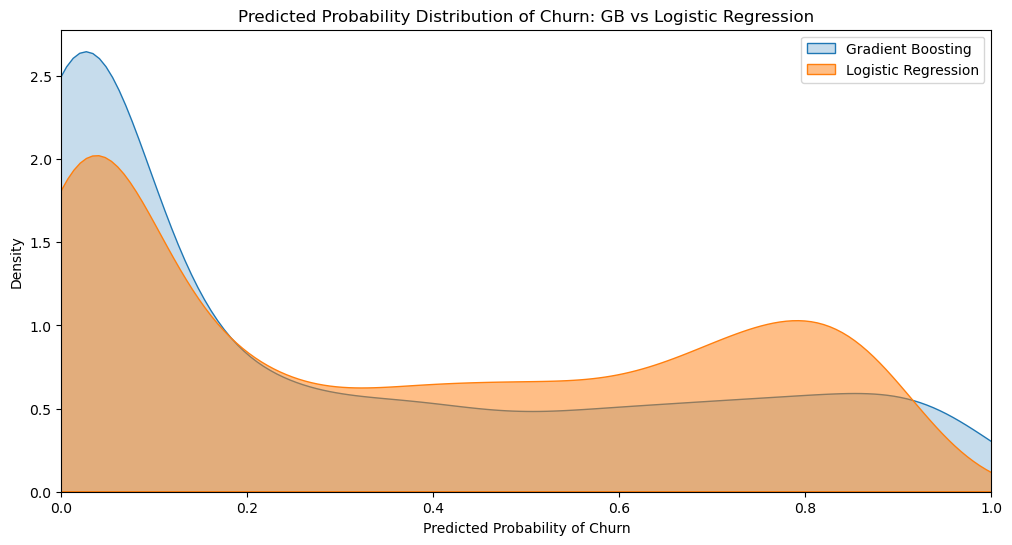

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

sns.kdeplot(gb_pred_df['Predicted_Probability'], label='Gradient Boosting', fill=True)
sns.kdeplot(lr_pred_df['Predicted_Probability'], label='Logistic Regression', fill=True, alpha=0.5)

plt.title("Predicted Probability Distribution of Churn: GB vs Logistic Regression")
plt.xlabel("Predicted Probability of Churn")
plt.ylabel("Density")
plt.xlim(0, 1)
plt.legend()
plt.show()

- Gradient Boosting probabilities are more spread out or skewed towards 1 for actual churners, it might be better at ranking high-risk customers.
- Logistic Regression more conservative, giving probabilities closer to 0.5.
- see overlaps — customers that both models consider risky versus disagreements.

### GB is confident and clearly separates customers into two groups:
- large cluster of "low-risk" (near 0.1).
- A large cluster of "high-risk" (near 0.9).
- it suggests GB learned strong patterns (e.g., some customers have features that clearly mark them as churners, others as non-churners).
## LR
- LR is confident many customers are low-risk (unlikely to churn). For these customers, LR predicts a ~0–20% chance of churning.
- Spike Near 0.8 - LR is confident many customers are high-risk (likely to churn). For these, it predicts an ~80% chance of churning.

## 1 = Yes (Customer WILL churn)

## 0 = No (Customer will NOT churn)

In [77]:
gb_pred_df.head(10)

,Actual,Predicted_Class,Predicted_Probability
185,1,1,0.932579
2715,1,1,0.242638
3825,0,0,0.090543
1807,0,0,0.556683
132,0,0,0.008231
1263,0,0,0.004488
3732,0,1,0.484423
1672,0,0,0.002705
811,0,0,0.071857
2526,0,0,0.001160
